#### 01 Machine Learning

linear regression formula: y=b+mx
output y, intercept b, slope m, feature x

linear regression line: kürzeste Abstände zu Punkten darstellen

#### 02 Exploratory Data Analysis

In [1]:
import pandas as pd

from sklearn.datasets import load_boston #boston dataset bereits in sklearn integriert
boston_dataset = load_boston()
## build a DataFrame
boston = pd.DataFrame(boston_dataset.data, 
                      columns=boston_dataset.feature_names) #integration des datensets in numpy
boston['MEDV'] = boston_dataset.target #gibt spalte MEDV als ziel aus

print(boston.shape[0]) #gibt rows aus, [1] gibt columns aus
print(boston.shape) #rows und columns
print(boston.columns) #column name
print(boston[['CHAS', 'RM', 'AGE', 'RAD', 'MEDV']].head()) #head von ausgewählten spalten
print(boston.head(n=3)) #head allgemein, (n=zahl) fakultativ


506
(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
   CHAS     RM   AGE  RAD  MEDV
0   0.0  6.575  65.2  1.0  24.0
1   0.0  6.421  78.9  2.0  21.6
2   0.0  7.185  61.1  2.0  34.7
3   0.0  6.998  45.8  3.0  33.4
4   0.0  7.147  54.2  3.0  36.2
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


Summary Statistics

In [2]:
print(boston.describe().round(2)) #uebersicht über gesamtstatistik mit auswertung nach anzahl, mittelwert, standardvarianz, min/max, quantilen
print(boston['AGE'].describe())

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  506.00  
mean   408.24    18.46  356.67   12.65   22.53  
std    168.54     2.16   91.29    7.14    9.20  
min    187.00    12.60    0.32    1.73    5.00  
25%    279.00    17.40  3

Visualization

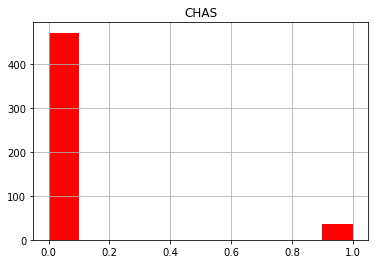

In [3]:
import matplotlib.pyplot as plt

boston.hist(column='CHAS', color = "r")
#plt.savefig('plot1.png')
plt.show()

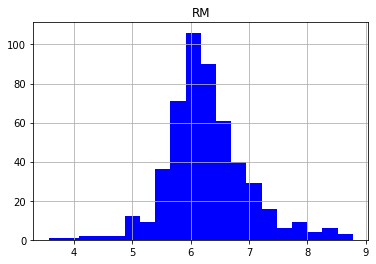

In [4]:
boston.hist(column="RM", bins=20, color="b")
plt.show()

#### 04 Correlation

Correlation Matrix
- Übersicht, wie Daten miteinander korrelieren
- Range: -1 bis 1

In [5]:
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

Data Preparation

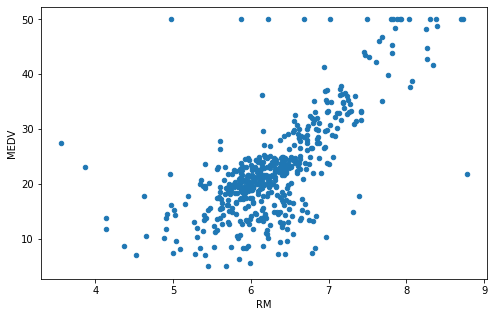

In [6]:
#scatter plot: macht am meisten sinn bei positiven korrelationen; zeigt beziehungen zwischen 2 features

boston.plot(kind="scatter", x = "RM", y="MEDV", figsize=(8,5)); #figsize mit (width, height)

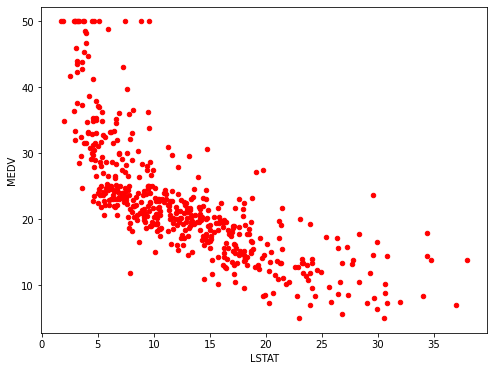

In [7]:
boston.plot(kind="scatter", x="LSTAT", y="MEDV", figsize=(8,6), color="r");

In [8]:
#scikit hat 2d-feature-matizen mit 2D-X-Arrays und einem 1D-zielarray
X = boston[["RM"]] #2d durch doppel-eckklammern
print(X.shape)

Y=boston["MEDV"]
print(Y.shape)

(506, 1)
(506,)


#### 04 Fitting a Univariate Linear Regression

Instantiating the Model
- training: training the model on newly unseen data, 70% of the data for training sets
- testing: testing set for evaluation, 30% of the data for testing sets
- train_test_split function splits the data into 2 random subsets
- Code

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size = 0.3, 
random_state=1)

Fitting the Model
- eqaual to training
- fits the model to the training data and finds the coefficients specified in the linear regression model (i.e. intercept and slope)
- model.fit(X_train, Y_train)
- fit() triggers compuations, results are stored in the model object
- fitting is how well the machine learning model measures against the data upon which it was trained

Parameter Estimates

In [28]:
import pandas as pd
import time
from sklearn.datasets import load_boston

time_start = time.perf_counter()

boston_dataset = load_boston()
## build a DataFrame
boston = pd.DataFrame(boston_dataset.data, 
                      columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

X = boston[['RM']]
Y = boston['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

print(f'Access the intercept from the model:', model.intercept_.round(2)) #gibt den intercept aus
print(f'Estimated coefficient of feature Regression model:', model.coef_.round(2)) #gibt den slope zurück

time_stop = time.perf_counter()

print(f"Elapsed time: {round(time_stop-time_start, 4)}s")

'''A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).'''

Access the intercept from the model: -30.57
Estimated coefficient of feature Regression model: [8.46]
Elapsed time: 0.0207s


'A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).'

Prediction

In [43]:
import pandas as pd

from sklearn.datasets import load_boston
boston_dataset = load_boston()
## build a DataFrame
boston = pd.DataFrame(boston_dataset.data, 
                      columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

X = boston[['RM']]
Y = boston['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

import numpy as np
new_RM = np.array([6.5]).reshape(-1,1) # make sure it's 2d
print(model.predict(new_RM)) #evaluation of test data based on predictions for unseen data
#print(model.intercept_+model.coef_*6.5) #same as predict

"""When the average number of rooms per dwelling is 6.5, the model predicts a home value of $24,426.06."""

[24.42606323]


'When the average number of rooms per dwelling is 6.5, the model predicts a home value of $24,426.06.'

In [39]:
#get predictions for all homes
y_test_predicted = model.predict(X_test)
print(y_test_predicted.shape)
print(type(y_test_predicted))

(152,)
<class 'numpy.ndarray'>


#### 05 Evaluating the Model

Residuals 
- how good our prediction is
- examine the model performance: compare the fitted line and the true observations in the test set 

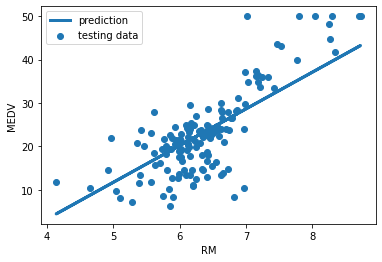

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

model = LinearRegression()
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
X = boston[['RM']]
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

model.fit(X_train, Y_train)

y_test_predicted = model.predict(X_test)

plt.scatter(X_test, Y_test,
label='testing data');
plt.plot(X_test, y_test_predicted,
label='prediction', linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.savefig("plot.png")
plt.show()

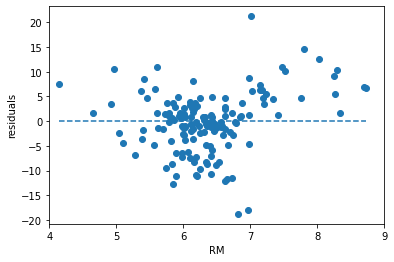

In [45]:
#measuring the distance between a point to the line along the vertical line
#this distance is called "residual" or "error"
#residual: difference between the observed value of the target and the predicted value
#the closer the residual is to 0 the better job the model is doing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

model = LinearRegression()
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
X = boston[['RM']]
Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

model.fit(X_train, Y_train)

y_test_predicted = model.predict(X_test)

residuals = Y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0,
xmin = X_test.min(), xmax=X_test.max(),
linestyle='--')
# set xlim
plt.xlim((4, 9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.savefig("plot.png")
plt.show()

#residuals scattered around the horizontal line with no particular pattern:
#random distribution (always a sign that the model is working)
#ideal: residuals should be symmetrically and randomly spaced arount the horizontal axis (near Zero)
#if residual plot shows some pattern linear or nonlinear: model could improve

Mean Squared Error

In [48]:
print(residuals[:5])

307    0.821016
343   -2.184437
47    -3.849350
67     2.836736
362    6.002659
Name: MEDV, dtype: float64


In [51]:
#model performance for all data points to report one number as the metric: make us of the average of all residuals
print(residuals.mean())
#problem: negative residuals
#solution: mean squared error (just use square number)#
print((residuals**2).mean())
#easier under scikit-learn
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_test_predicted)
print(mse)
#the smaller the mse the better
#in this example: mse of 36 with a variance of 92 => compared to the 
#total variance 36 is not bad

-0.23645087766388564
36.5172147308386
36.517214730838624
